In [1]:
cd ..

/home/dmitriishubin/Desktop/Thesis/HepaticVessel_experiment


In [3]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

/home/dmitriishubin/anaconda3/envs/thesis/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [4]:
img = nib.load('../data/HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_001.nii.gz')

seg = nib.load('../data/HepaticVessel/Task08_HepaticVessel/labelsTr/hepaticvessel_001.nii.gz')

In [5]:
img = np.array(img.dataobj)
seg = np.array(seg.dataobj)




In [7]:
img.shape

(512, 512, 49)

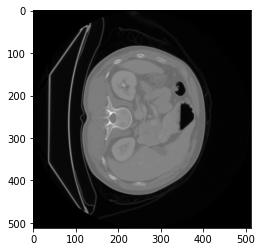

In [8]:
plt.imshow(img[:,:,20].reshape(512,512,1), cmap='gray')

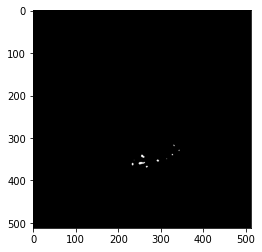

In [9]:
plt.imshow(seg[:,:,20].reshape(512,512,1), cmap='gray')

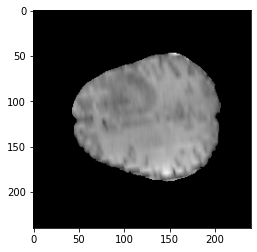

In [32]:
plt.imshow(X, cmap='gray')

In [9]:
patients =  [i for i in os.listdir('../data/brats/MICCAI_BraTS2020_TrainingData/') if i.find('.')==-1]
len(patients)

369

# remove all npy files

In [10]:
import glob

for patient in patients:
    fileList = glob.glob(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/*.npy')

    for filePath in fileList:
        try:
            os.remove(filePath)
        except:
            print("Error while deleting file : ", filePath)

# Save dataset as numpy arrays

In [27]:
names = []
for patient in patients:
    records = [i for i in os.listdir('../data/brats/MICCAI_BraTS2020_TrainingData/'+patient) if i.find('npy')==-1]
    
    for record in records:
        img = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/'+patient+'/'+record)
        img = np.array(img.dataobj)
        
        #for i in range(img.shape[2]):
        for i in range(img.shape[2]):
            temp = img[:,:,i]
            temp = temp.reshape(temp.shape[0],temp.shape[1],1)
            
            name = '../data/brats/MICCAI_BraTS2020_TrainingData/'+patient+'/'+record
            name = name[:-7]
            name = '_'.join(name.split('_')[:-1])+f'_{i}_'+name.split('_')[-1]+'.npy'
            np.save(name,temp)
            print(temp.shape)
            
    

(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 

KeyboardInterrupt: 

In [33]:
from torch import nn

m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = loss(m(input), target)
output.backward()

NameError: name 'torch' is not defined